# 📊 Customer Churn Analysis & Prediction using Python

## 🎯 Project Objective
To analyze customer data, identify churn patterns, and build a machine learning model to predict customer churn and support data-driven retention strategies.


### Key Insights
- Customers with **short tenure** are more likely to churn
- **Month-to-month contracts** have highest churn
- Higher **monthly charges** increase churn probability
- Long-term contracts reduce churn significantly


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [14]:
#Loading Dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#Basic Inspection
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
#Data Cleaning
# Remove extra spaces from all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)


In [18]:
#Encode Target Variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

Exploratory Data Analysis (EDA)

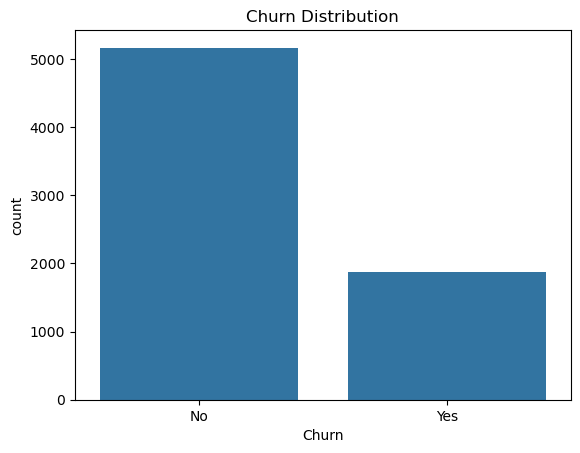

In [21]:
#Churn Distribution
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

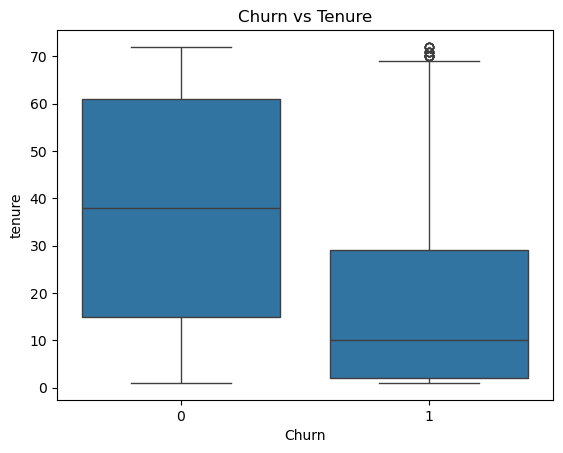

In [22]:
#Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

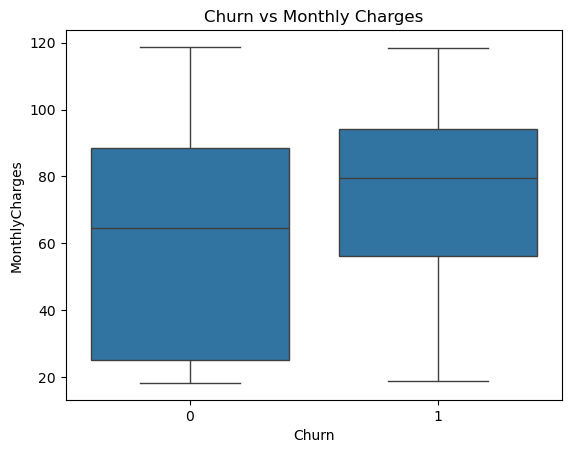

In [23]:
#Churn vs Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()

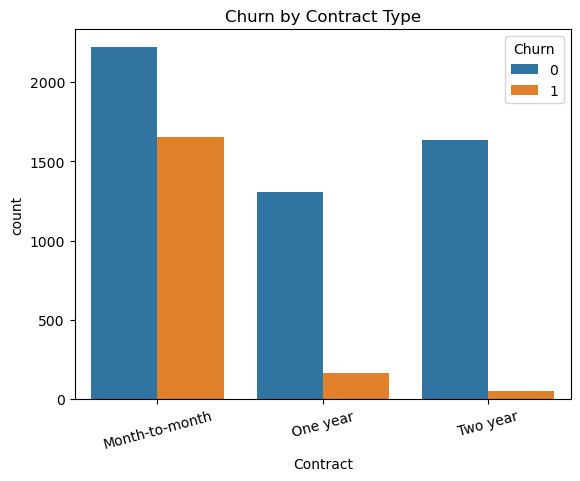

In [24]:
#Churn vs Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

In [25]:
#Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [26]:
#Feature Scaling
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [28]:
#Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7874911158493249
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [29]:
#Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [30]:
#Feature Importance (Top Churn Factors)
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

TotalCharges                      0.193409
MonthlyCharges                    0.169758
tenure                            0.167572
InternetService_Fiber optic       0.039999
PaymentMethod_Electronic check    0.035016
OnlineSecurity_Yes                0.028905
Contract_Two year                 0.028618
gender_Male                       0.026971
TechSupport_Yes                   0.025829
PaperlessBilling_Yes              0.025044
dtype: float64

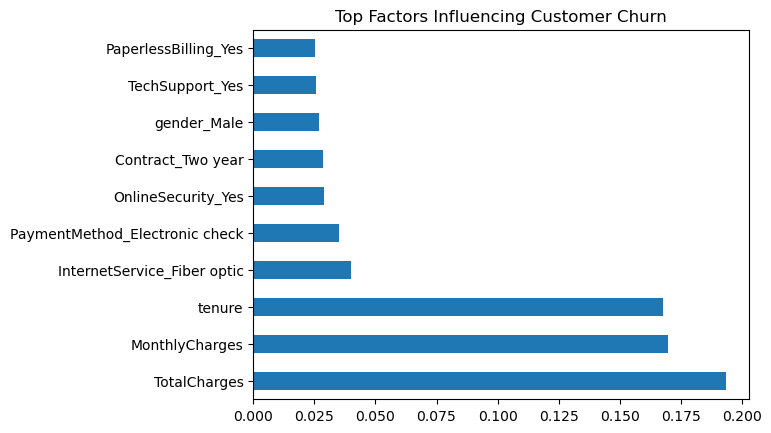

In [31]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top Factors Influencing Customer Churn")
plt.show()
